In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import tensorflow as tf
import time
from model.pspunet import pspunet
from util.angle import *
from util.depth import *
from util.path import *
from util.visualizer import *
from util.object_dection import *
from util.selly_vision_api import *

gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    try:
        tf.config.experimental.set_virtual_device_configuration(
       gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1000)])
    except RuntimeError as e:
        print(e)

        
IMG_WIDTH = 480
IMG_HEIGHT = 272
n_classes = 7

model = pspunet((IMG_HEIGHT, IMG_WIDTH ,3), n_classes)
model.load_weights("pspunet_weight.h5")

ANGLE_CLASS = 18
ANGLE = angle_dict(ANGLE_CLASS)
ANGLE_IMG=angle_img(ANGLE, ANGLE_CLASS)

data = np.load("video_data.npz")
data = data["arr_0"]

img = data[:,0,:,:,:]
point_cloud = data[:,1,:,:,:]

Virtual devices cannot be modified after being initialized


In [6]:
cv2.resize(img[0], (240, 135))

array([[[151.  , 146.25, 102.5 ],
        [ 70.5 ,  69.  ,  42.75],
        [ 34.75,  28.75,  20.25],
        ...,
        [254.25, 254.5 , 253.25],
        [253.75, 254.25, 252.75],
        [254.  , 254.  , 253.  ]],

       [[119.25, 123.75,  66.25],
        [ 64.  ,  63.75,  30.5 ],
        [ 53.  ,  48.  ,  34.75],
        ...,
        [224.25, 251.  , 247.25],
        [220.5 , 253.  , 250.  ],
        [216.5 , 252.75, 248.75]],

       [[ 56.5 ,  49.5 ,  28.75],
        [ 44.75,  38.  ,  26.5 ],
        [ 31.5 ,  24.25,  17.75],
        ...,
        [183.75, 232.25, 244.25],
        [178.5 , 232.  , 244.25],
        [189.75, 243.75, 248.5 ]],

       ...,

       [[ 48.  ,  53.25,  50.25],
        [ 51.  ,  56.  ,  53.  ],
        [ 48.75,  53.75,  50.75],
        ...,
        [ 99.75,  87.5 ,  77.25],
        [ 99.5 ,  89.  ,  77.75],
        [ 99.25,  89.25,  77.75]],

       [[ 48.  ,  53.75,  50.75],
        [ 45.75,  50.75,  48.  ],
        [ 47.25,  52.  ,  49.  ],
        .

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


300


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


301


UnboundLocalError: local variable 'moving_object' referenced before assignment

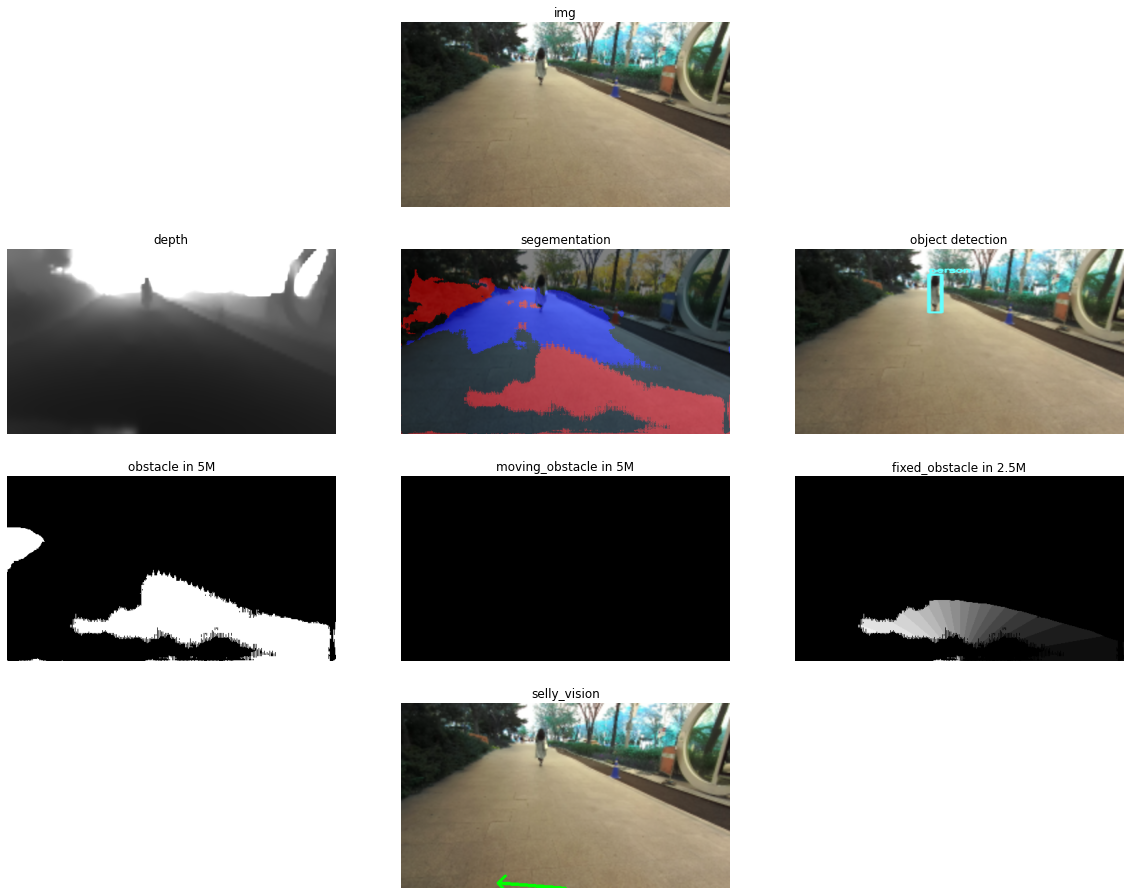

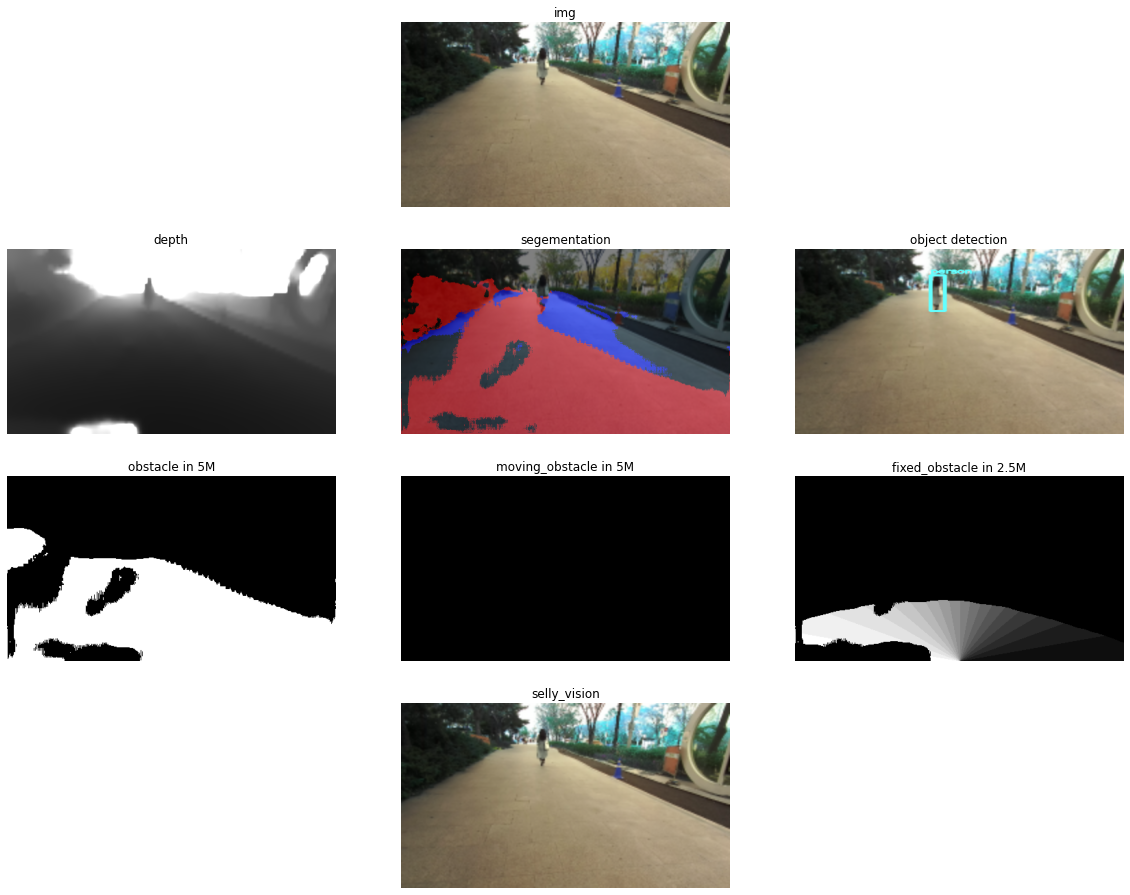

In [8]:
for i in range(300, 700):
    start = time.time()
    img_resize = cv2.resize(img[i], (240, 135))
    visualize(model, RGB(cv2.resize(img_resize, (480, 270))), point_cloud[i], 5, 2.5, ANGLE, ANGLE_CLASS,ANGLE_IMG)
    plt.savefig('selly_vision_video/image_at_epoch_{:04d}.png'.format(i))
    print(i)

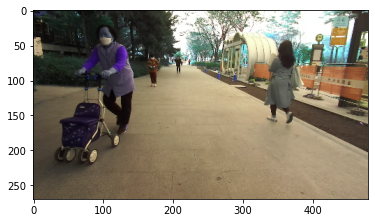

In [2]:
i = 144
plt.imshow(selly_vision_redis(img[i], point_cloud[i])[0]/255)
#visualize(model, img[i], point_cloud[i], 5, 2.5, ANGLE, ANGLE_CLASS, ANGLE_IMG)

In [5]:
#동영상 녹화
import os 

vision_img_list = os.listdir("selly_vision_video/")

max_dist = 5
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('selly_vision2.mp4', fourcc, 10.0, (1440, 1152))
vision_img_list.sort()
for idx in range(1101):
    start_time = time.time()
    vision_img = cv2.imread("selly_vision_video/"+vision_img_list[idx])
    out.write(vision_img)
    print(time.time()-start_time)
    
out.release()

0.04553341865539551
0.03356003761291504
0.03363609313964844
0.031579017639160156
0.031456947326660156
0.031499385833740234
0.028311967849731445
0.039034128189086914
0.0312652587890625
0.031113386154174805
0.03238201141357422
0.031714677810668945
0.037078142166137695
0.03207826614379883
0.032340049743652344
0.030251026153564453
0.03223681449890137
0.03163862228393555
0.03162717819213867
0.03234148025512695
0.03174734115600586
0.029446840286254883
0.03446221351623535
0.03174638748168945
0.03358149528503418
0.034433841705322266
0.031375885009765625
0.03143024444580078
0.029717683792114258
0.03507184982299805
0.03128695487976074
0.03132224082946777
0.031178712844848633
0.030414581298828125
0.0317080020904541
0.031199216842651367
0.03277158737182617
0.035858869552612305
0.031295061111450195
0.031084537506103516
0.03086233139038086
0.03417611122131348
0.03187990188598633
0.031536102294921875
0.03134727478027344
0.03142976760864258
0.033472537994384766
0.03147244453430176
0.032787322998046875

0.03377127647399902
0.03137922286987305
0.02711963653564453
0.031524658203125
0.028810501098632812
0.036435842514038086
0.03145599365234375
0.03137040138244629
0.031033992767333984
0.02811598777770996
0.03203010559082031
0.031080245971679688
0.03247356414794922
0.03236889839172363
0.028004169464111328
0.03559708595275879
0.03119182586669922
0.03110218048095703
0.033480167388916016
0.029999732971191406
0.03351783752441406
0.03122425079345703
0.031304359436035156
0.03044271469116211
0.03226780891418457
0.03464698791503906
0.031096696853637695
0.03113412857055664
0.03241682052612305
0.032132625579833984
0.031156539916992188
0.031230449676513672
0.031371355056762695
0.031105756759643555
0.033252716064453125
0.0376131534576416
0.047882080078125
0.030028343200683594
0.03481030464172363
0.03129434585571289
0.031203508377075195
0.03212618827819824
0.030549287796020508
0.03403115272521973
0.03089427947998047
0.03108978271484375
0.03114461898803711
0.028393030166625977
0.03132820129394531
0.0310

0.02837824821472168
0.02731609344482422
0.03169965744018555
0.03433108329772949
0.030436277389526367
0.03529620170593262
0.03174781799316406
0.03281068801879883
0.033388376235961914
0.029982566833496094
0.03535628318786621
0.031077861785888672
0.0313258171081543
0.031287431716918945
0.03041815757751465
0.0367283821105957
0.031653642654418945
0.03119659423828125
0.03151822090148926
0.030750274658203125
0.03137350082397461
0.03304004669189453
0.03141641616821289
0.03509402275085449
0.029745817184448242
0.031174421310424805
0.03140878677368164
0.03250765800476074
0.03571438789367676
0.03044605255126953
0.03139162063598633
0.03114032745361328
0.03136849403381348
0.035279035568237305
0.03084087371826172
0.02720022201538086
0.03567147254943848
0.03544735908508301
0.02875661849975586
0.03262495994567871
0.03575444221496582
0.03267645835876465
0.05130767822265625
0.055823326110839844
0.031804561614990234
0.03126668930053711
0.03124856948852539
0.035417795181274414
0.030050277709960938
0.035295